In [23]:
#import the packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import argparse
from skimage.color import rgb2gray

In [25]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
# trainX = trainX.reshape((trainX.shape[0], 3072))
# testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 data...


In [26]:
print(trainX.shape)
print(testX.shape)

# Convert trainX to grayscale
trainX_gray = rgb2gray(trainX)
trainX = trainX_gray.reshape((trainX_gray.shape[0], -1))

# Convert testX to grayscale
testX_gray = rgb2gray(testX)
testX = testX_gray.reshape((testX_gray.shape[0], -1))

print(trainX.shape)
print(testX.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1024)
(10000, 1024)


IndexError: ignored

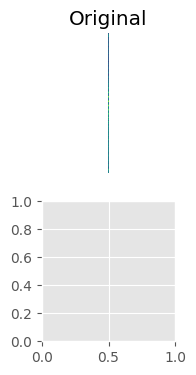

In [31]:
num_images_to_display = 5

trainX = np.expand_dims(trainX, axis=-1)  # Add a singleton dimension for the channel
plt.figure(figsize=(10, 4))
for i in range(num_images_to_display):
    # Original Image
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(trainX[i])
    plt.title("Original")
    plt.axis('off')

    # Grayscale Image
    plt.subplot(2, num_images_to_display, i + num_images_to_display + 1)
    plt.imshow(trainX_gray[i, :, :, 0], cmap='gray')  # Access the first channel
    plt.title("Grayscale")
    plt.axis('off')

plt.show()

In [3]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

In [4]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [5]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=50, batch_size=32)

[INFO] training network...
Epoch 1/50
1563/1563 [==============================] - 13s 5ms/step - loss: 1.8413 - accuracy: 0.3441 - val_loss: 1.7668 - val_accuracy: 0.3660
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6538 - accuracy: 0.4149 - val_loss: 1.6167 - val_accuracy: 0.4375
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5712 - accuracy: 0.4422 - val_loss: 1.6577 - val_accuracy: 0.4107
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5103 - accuracy: 0.4667 - val_loss: 1.5563 - val_accuracy: 0.4488
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4635 - accuracy: 0.4817 - val_loss: 1.5309 - val_accuracy: 0.4706
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4232 - accuracy: 0.4966 - val_loss: 1.4665 - val_accuracy: 0.4820
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3879 - accuracy: 0.5101 - val_

In [6]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

model.summary()

[INFO] evaluating network...
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.69      0.57      0.63      1000
  automobile       0.79      0.53      0.63      1000
        bird       0.39      0.54      0.46      1000
         cat       0.44      0.23      0.30      1000
        deer       0.57      0.31      0.40      1000
         dog       0.38      0.60      0.47      1000
        frog       0.58      0.66      0.62      1000
       horse       0.60      0.60      0.60      1000
        ship       0.74      0.65      0.69      1000
       truck       0.52      0.76      0.62      1000

    accuracy                           0.55     10000
   macro avg       0.57      0.55      0.54     10000
weighted avg       0.57      0.55      0.54     10000

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dens

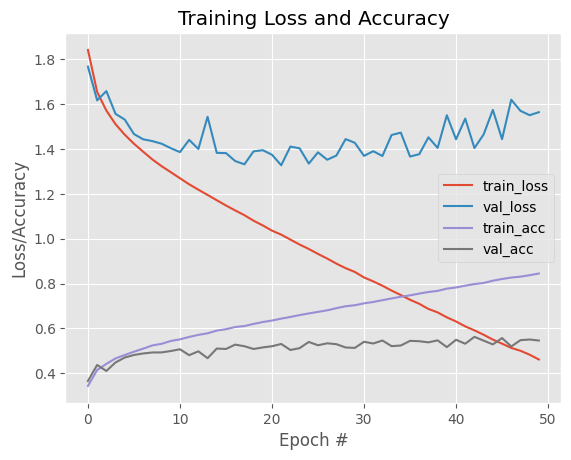

In [8]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

313/313 [==============================] - 2s 5ms/step
(10000,)
(10000,)


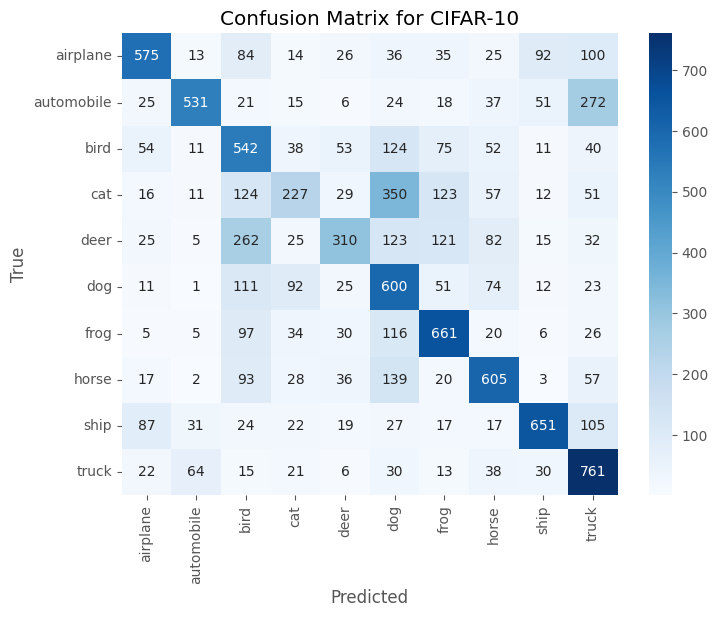

In [19]:
# Make predictions on the test set
y_pred = model.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(testY, axis=1)

print(y_pred_classes.shape)
print(y_true.shape)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CIFAR-10')
plt.show()